In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data Preprocessing

In [31]:
cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
df = pd.read_csv("/users/salah/documents/wheat-seeds-classification/data/seeds_dataset.txt", names=cols, sep="\s+")

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zz/fn6m71xn7kx55y0nwsb0gxsh0000gn/T/ipykernel_89455/1449368464.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("/users/salah/documents/wheat-seeds-classification/data/seeds_dataset.txt", names=cols, sep="\s+")


,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


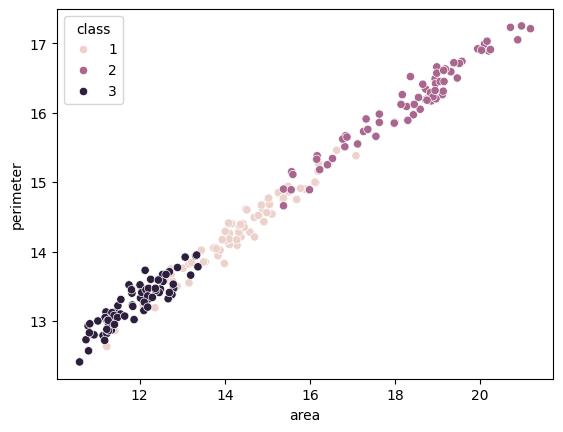

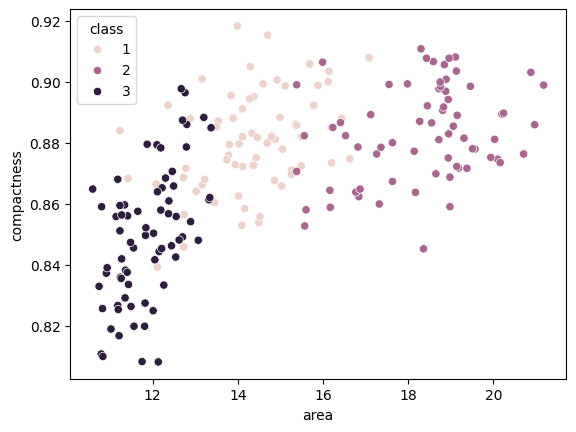

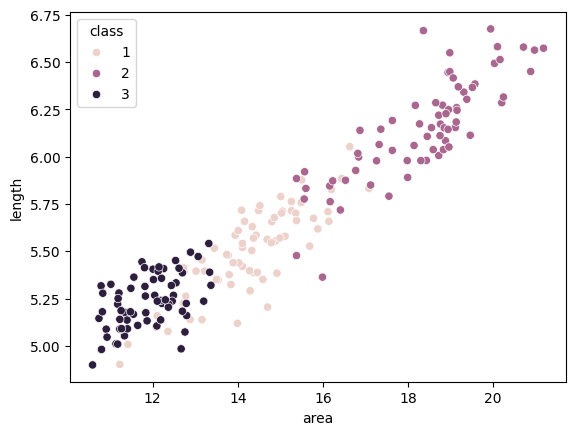

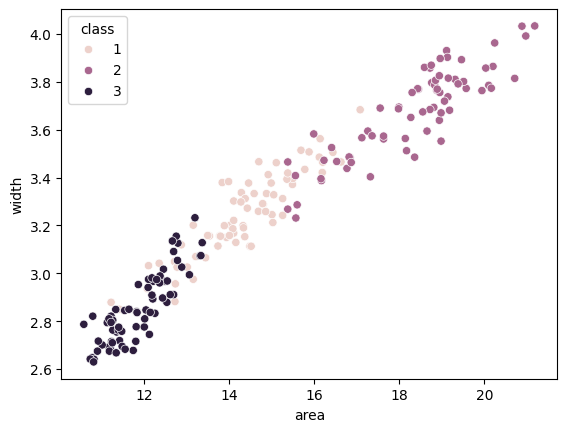

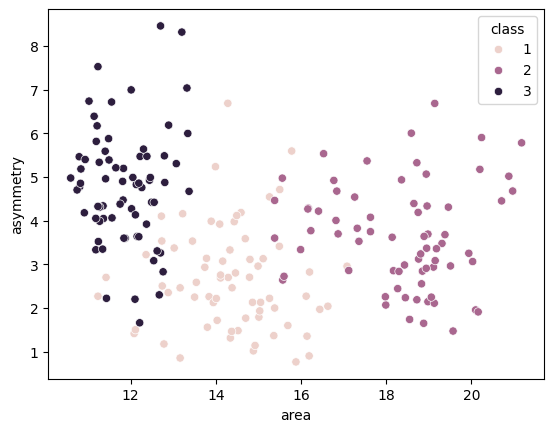

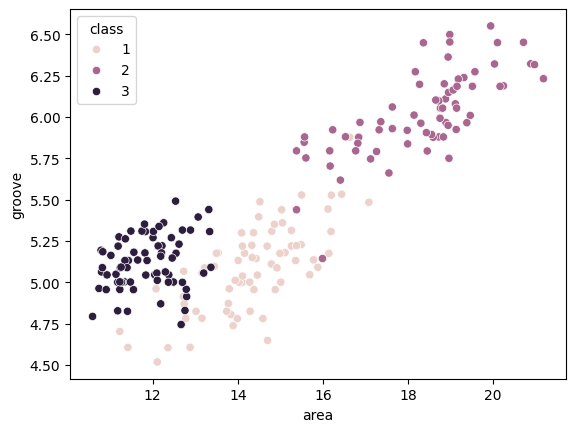

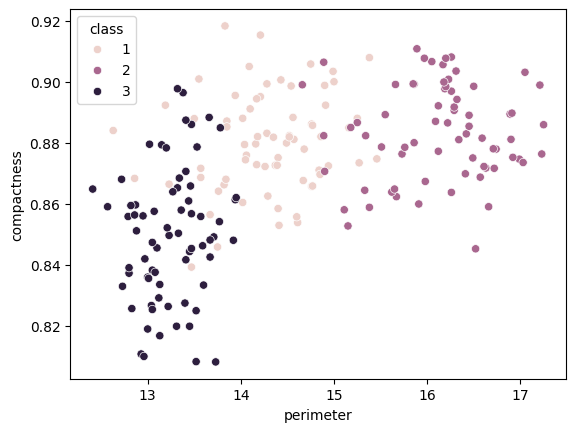

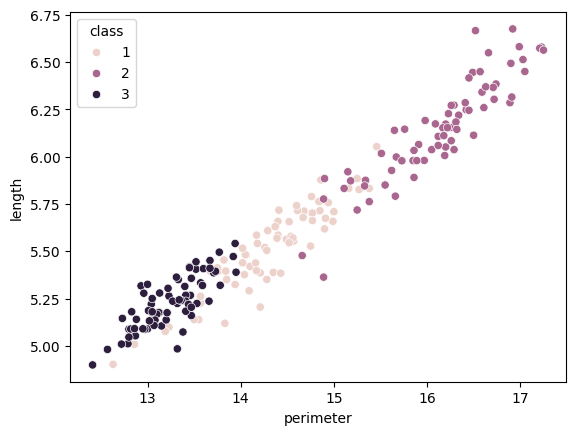

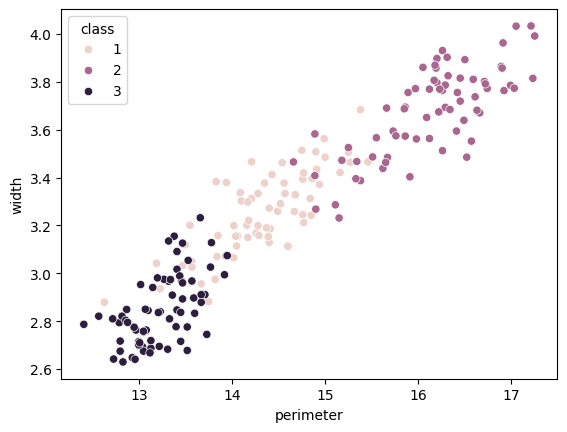

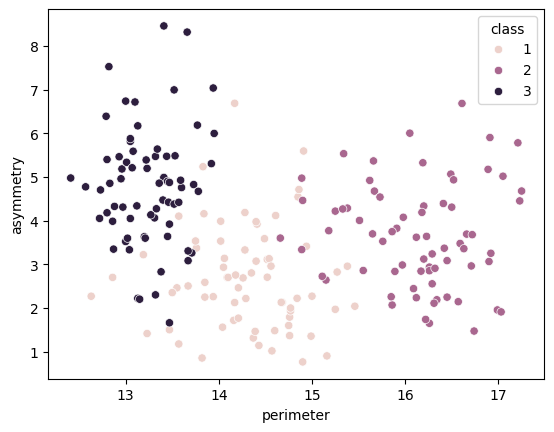

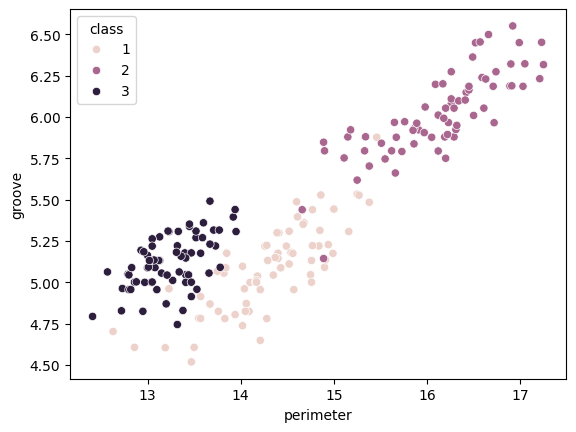

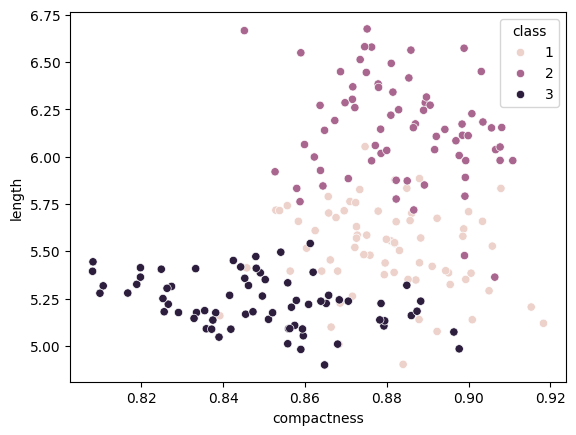

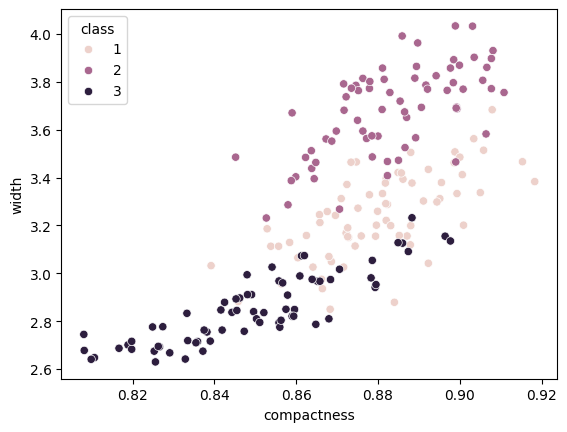

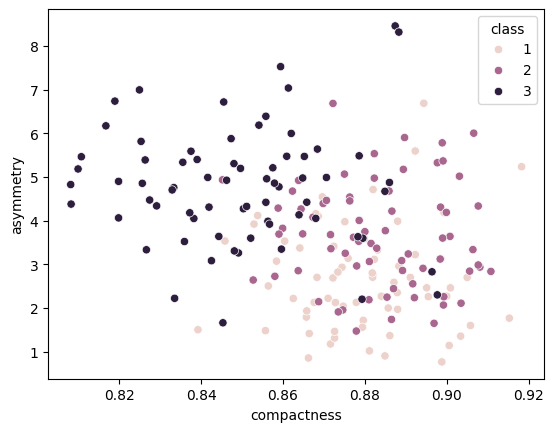

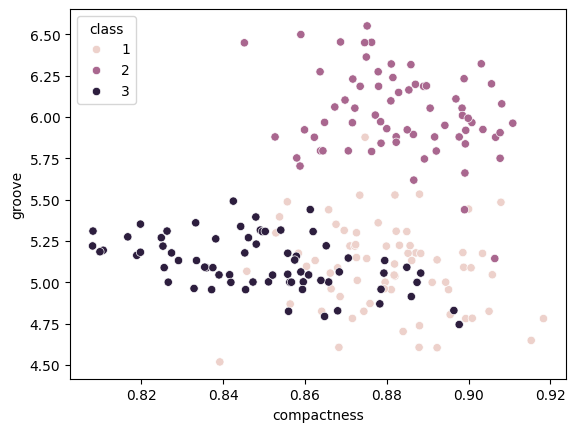

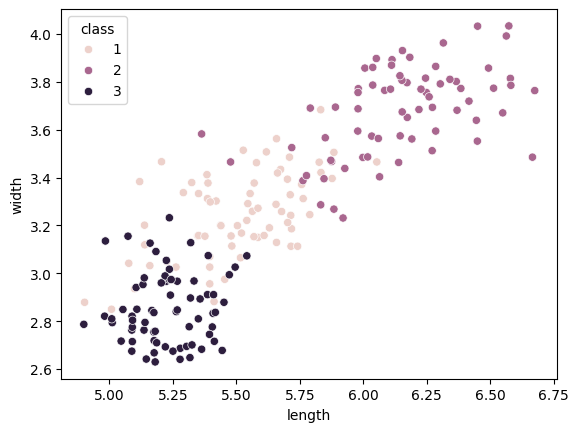

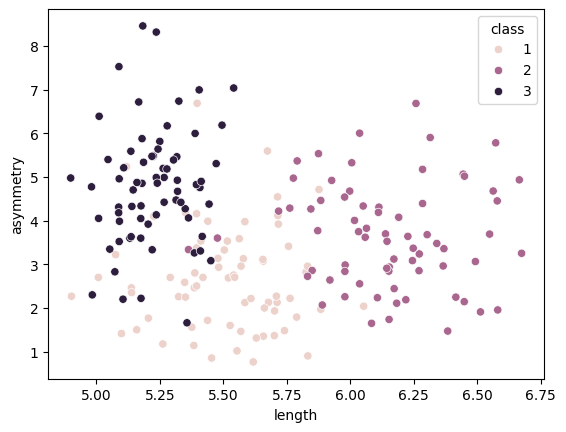

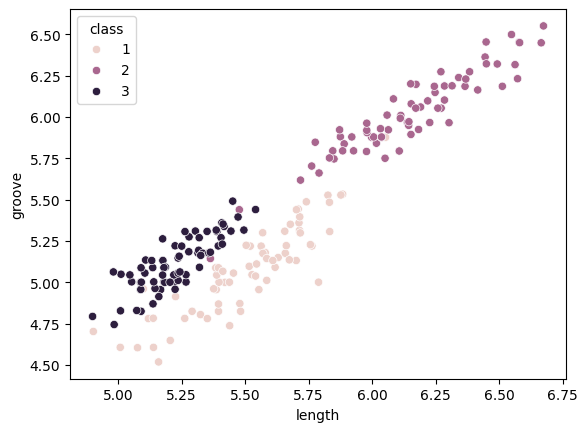

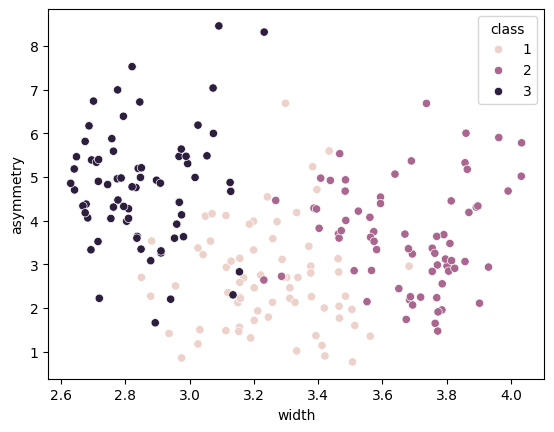

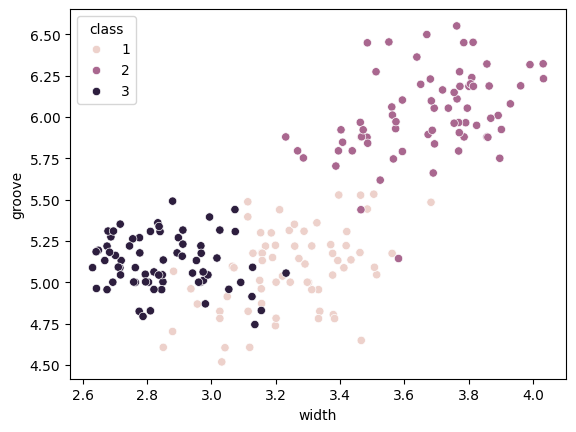

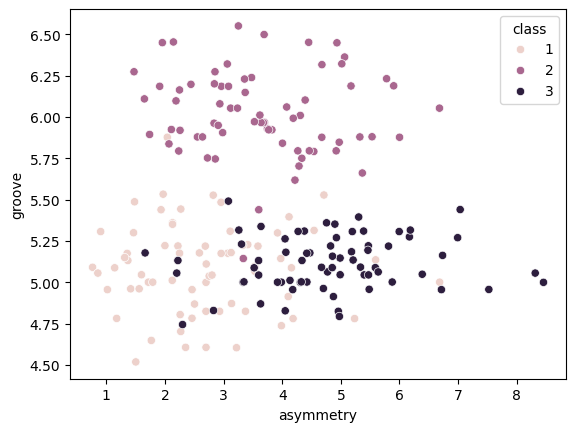

In [10]:
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols) - 1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

In [36]:
x = 'compactness'
y = 'asymmetry'
X = df[[x, y]].values

kmeans = KMeans(n_clusters=3).fit(X)
clusters = kmeans.labels_
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2], dtype=int32)

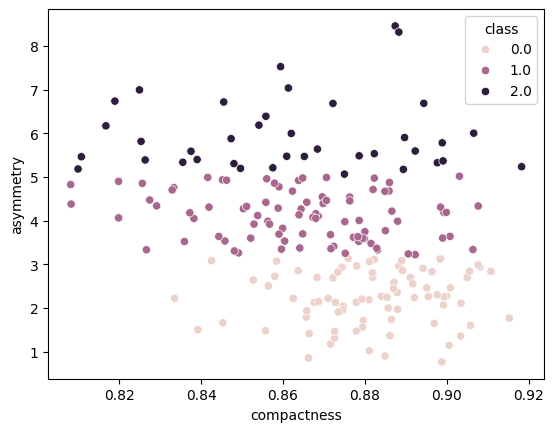

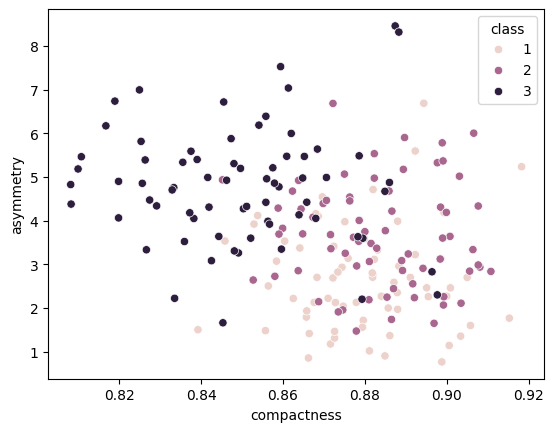

In [37]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, 'class'])
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.show()
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.show()

In [38]:
X = df[cols[:-1]].values
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)

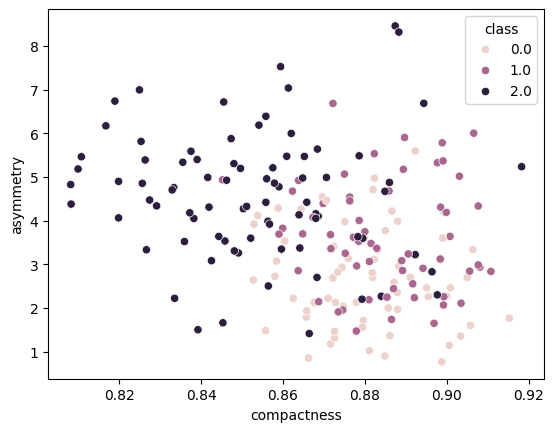

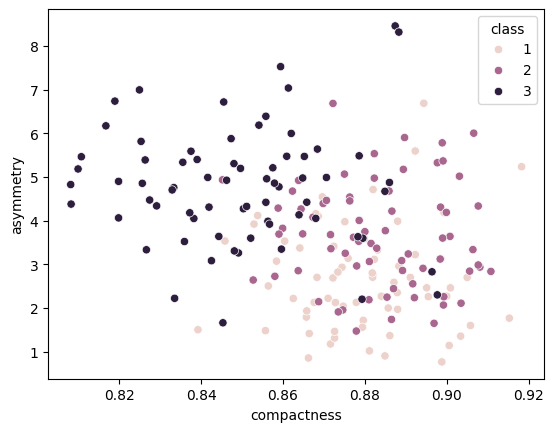

In [39]:
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.show()
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.show()

In [48]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

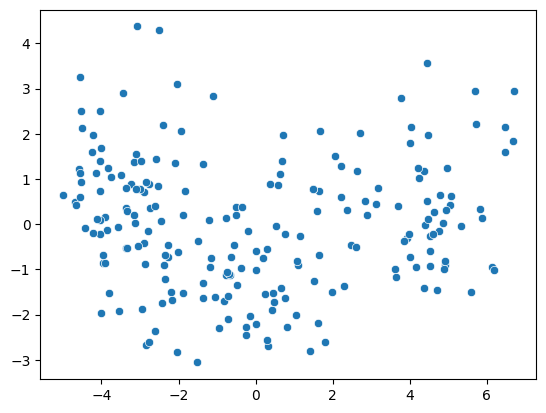

In [52]:
sns.scatterplot(x=transformed_x[:,0], y=transformed_x[:, 1])
plt.show()

In [55]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=['PCA1', 'PCA2', 'class'])
actual_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1, 1))), columns=['PCA1', 'PCA2', 'class'])

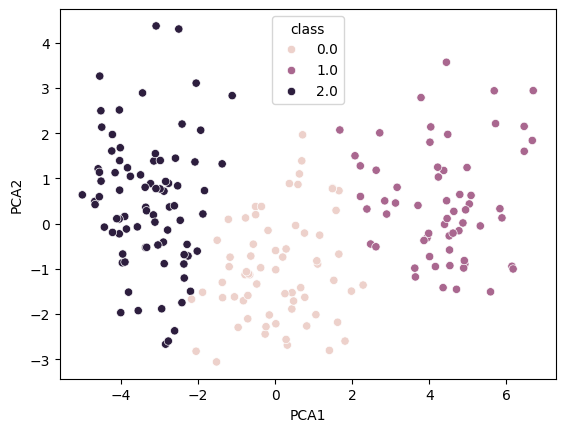

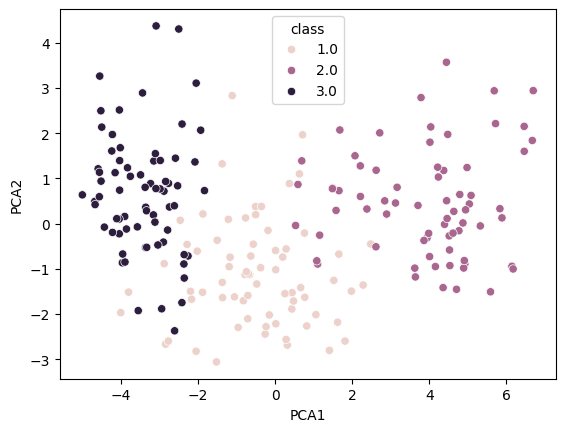

In [56]:
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=kmeans_pca_df)
plt.show()
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=actual_pca_df)
plt.show()